## Zomato Data Analysis Project

## Project Overview

## Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [40]:
dataframe = pd.read_csv("zomato data.csv")
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,FreshMenu,Yes,No,3.9/5,566.282292,448.268063,Dining
1,Me And My Cake,No,No,3.7/5,NaN,510.233169,Dining
2,Smacznego,Yes,No,4.2/5,454.827917,554.083820,Cafes
3,Smacznego,Yes,No,4.2/5,454.827917,554.083820,Cafes
4,Redberrys,Yes,No,4.0/5,191.639532,595.524103,Cafes


## Preview data

In [41]:
print(dataframe.shape)
print(dataframe.info())
print(dataframe.describe())

(5010, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         5010 non-null   object 
 1   online_order                 5010 non-null   object 
 2   book_table                   5010 non-null   object 
 3   rate                         5010 non-null   object 
 4   votes                        3893 non-null   float64
 5   approx_cost(for two people)  5010 non-null   float64
 6   listed_in(type)              5010 non-null   object 
dtypes: float64(2), object(5)
memory usage: 274.1+ KB
None
             votes  approx_cost(for two people)
count  3893.000000                  5010.000000
mean    342.087993                   418.570464
std     727.152023                   223.722637
min       3.544928                    86.687051
25%      28.252485                   216.358539
50%      86.667

## Data Cleaning

In [42]:
# Remove duplicates
dataframe.drop_duplicates(inplace=True)
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 5008
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         5000 non-null   object 
 1   online_order                 5000 non-null   object 
 2   book_table                   5000 non-null   object 
 3   rate                         5000 non-null   object 
 4   votes                        3886 non-null   float64
 5   approx_cost(for two people)  5000 non-null   float64
 6   listed_in(type)              5000 non-null   object 
dtypes: float64(2), object(5)
memory usage: 312.5+ KB
None


In [43]:
# Handle missing values
print("\nMissing Values:\n", dataframe.isnull().sum())


Missing Values:
 name                              0
online_order                      0
book_table                        0
rate                              0
votes                          1114
approx_cost(for two people)       0
listed_in(type)                   0
dtype: int64


In [44]:
dataframe['votes'] = dataframe['votes'].fillna(0)

In [45]:
print("\nMissing Values:\n", dataframe.isnull().sum())


Missing Values:
 name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


In [46]:
# Clean Rating Column
# Convert 'rate' to numeric
def convert_rate(value):
    if isinstance(value, str):
        value = value.replace('/5','')
        return float(value)
    return value
dataframe['rate'] = dataframe['rate'].apply(convert_rate)
print(dataframe.head())

             name online_order book_table  rate       votes  \
0       FreshMenu          Yes         No   3.9  566.282292   
1  Me And My Cake           No         No   3.7    0.000000   
2       Smacznego          Yes         No   4.2  454.827917   
4       Redberrys          Yes         No   4.0  191.639532   
5        Goa 0 Km          Yes        Yes   3.6  159.653672   

   approx_cost(for two people) listed_in(type)  
0                   448.268063          Dining  
1                   510.233169          Dining  
2                   554.083820           Cafes  
4                   595.524103           Cafes  
5                   770.324489          Dining  


In [51]:
# Clean Cost Column
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(int)

In [55]:
# Rename column for simplicity
dataframe.rename(columns={'approx_cost(for two people)': 'cost_for_two'}, inplace=True)

## Key Performance Indicators (KPIs)

In [57]:
avg_rating = dataframe['rate'].mean()
avg_cost = dataframe['cost_for_two'].mean()
total_restaurants = dataframe.shape[0]
online_percentage = (dataframe['online_order'] == 'Yes').mean() * 100


print("\nKey Metrics")
print("Average Rating:", round(avg_rating, 2))
print("Average Cost for Two: ₹", round(avg_cost, 2))
print("Total Restaurants:", total_restaurants)
print("Online Order %:", round(online_percentage, 2))


Key Metrics
Average Rating: 3.63
Average Cost for Two: ₹ 418.18
Total Restaurants: 5000
Online Order %: 39.2


## Exploratory Data Analysis (EDA)

##### Restaurant Type Distribution

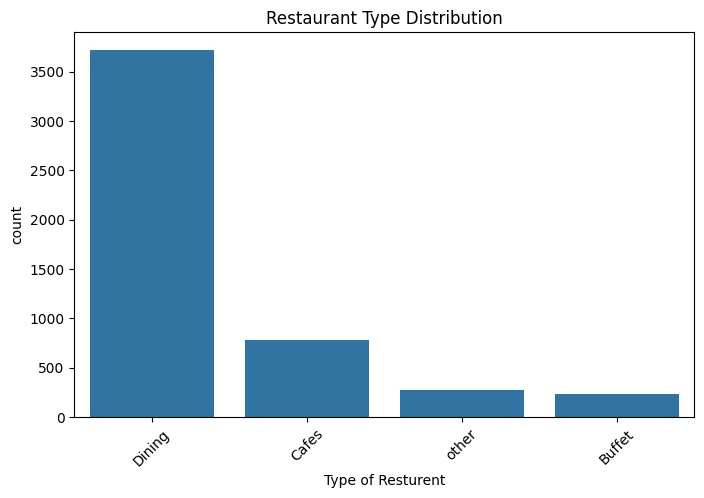

In [66]:
plt.figure(figsize = (8,5))
sns.countplot(x='listed_in(type)', data=dataframe)
plt.title("Restaurant Type Distribution")
plt.xlabel('Type of Resturent')
plt.xticks(rotation=45)
plt.show()

##### Conclusion : Majority of restaurant falls in dining category

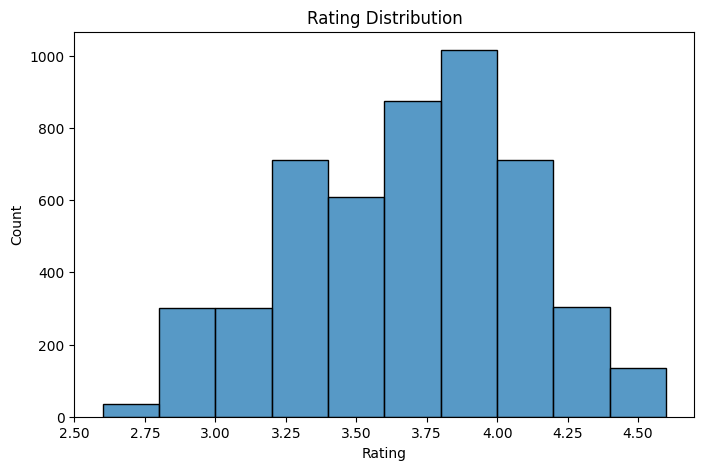

In [71]:
# Rating Distribution
plt.figure(figsize = (8,5))
sns.histplot(dataframe['rate'], bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.show()

##### Conclusion : The majority of restaurant received ratings from 3.5 to 4

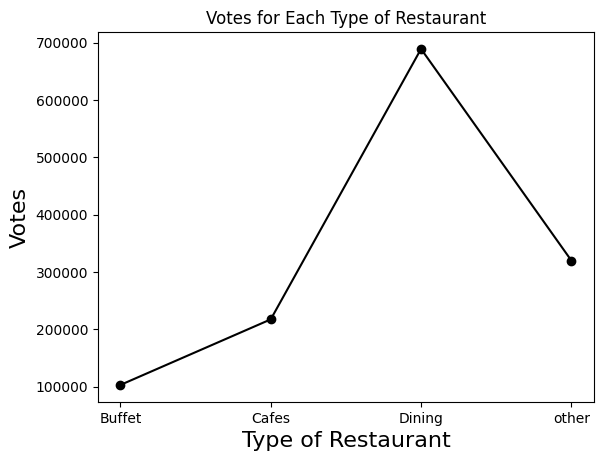

In [84]:
# Votes for Each Type of Restaurant
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result, c = "black", marker = "o")
plt.xlabel('Type of Restaurant', c = 'black', size = 16)
plt.ylabel('Votes', c = "black", size = 16)
plt.title('Votes for Each Type of Restaurant')
plt.show()

##### Conclusion : Dining restaurant has recived maximum votes

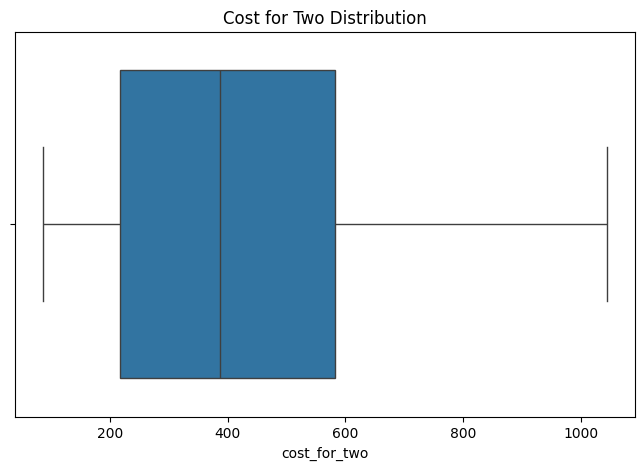

In [74]:
# Cost Distribution
plt.figure(figsize = (8,5))
sns.boxplot(x=dataframe['cost_for_two'])
plt.title("Cost for Two Distribution")
plt.show()

##### Conclusion  : Most restaurants fall in the ₹200–₹600 range with a median around ₹400, showing a mainly affordable market with few expensive options.

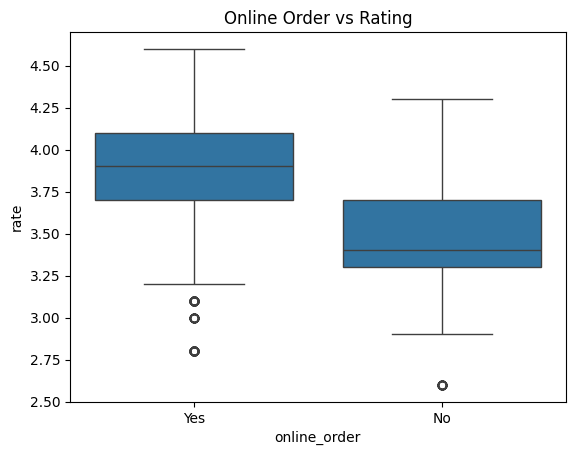

In [76]:
# Online Order vs Rating
plt.figure()
sns.boxplot(x='online_order', y='rate', data=dataframe)
plt.title("Online Order vs Rating")
plt.show()

##### Conclusion : Offline orders received lower ratings in comparison to online

Text(0.5, 1.0, 'Correlation Heatmap')

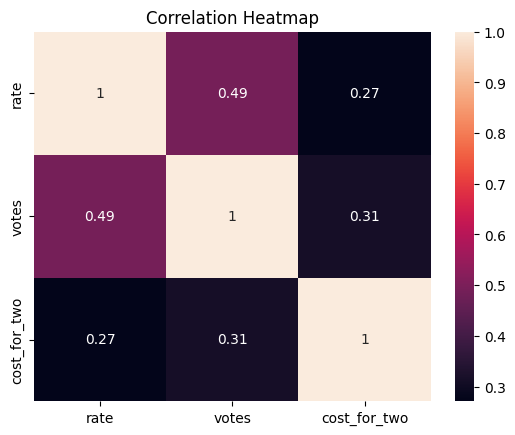

In [79]:
# Correlation Heatmap
plt.figure()
num_data = dataframe[['rate', 'votes', 'cost_for_two']]
sns.heatmap(num_data.corr(), annot=True)
plt.title("Correlation Heatmap")

## Final Insights & Recommendations

Insights:
- Dining restaurants dominate the platform.
- Medium-priced restaurants (₹200–₹400) receive higher ratings.
- Online ordering restaurants tend to have better ratings.
- Higher votes are moderately correlated with higher ratings.

Recommendations:
- Promote online ordering services.
- Focus on affordable and mid-range pricing.
- Improve service quality for offline restaurants.
- Invest in popular dining categories.